In [311]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Wine dataset

### Entropy

In [312]:
df = pd.read_csv('wine_data.csv')

# convert the categorical features into numerical ones
df = pd.get_dummies(df)
df = df[['Alcohol_content_low', 'Alcohol_content_high', 'Sweetness_dry', 'Sweetness_semi-sweet', 'Sweetness_sweet', 'Type_red', 'Type_rose', 'Type_white', 'Popular_yes', 'Popular_no']] # Rearranging the data

# split the data into features and targets

Y_train = df.iloc[:, [-2, -1]]
X_train = df.drop(Y_train.columns, axis=1)

In [313]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_train)
Y_pred_proba = clf.predict_proba(X_train)

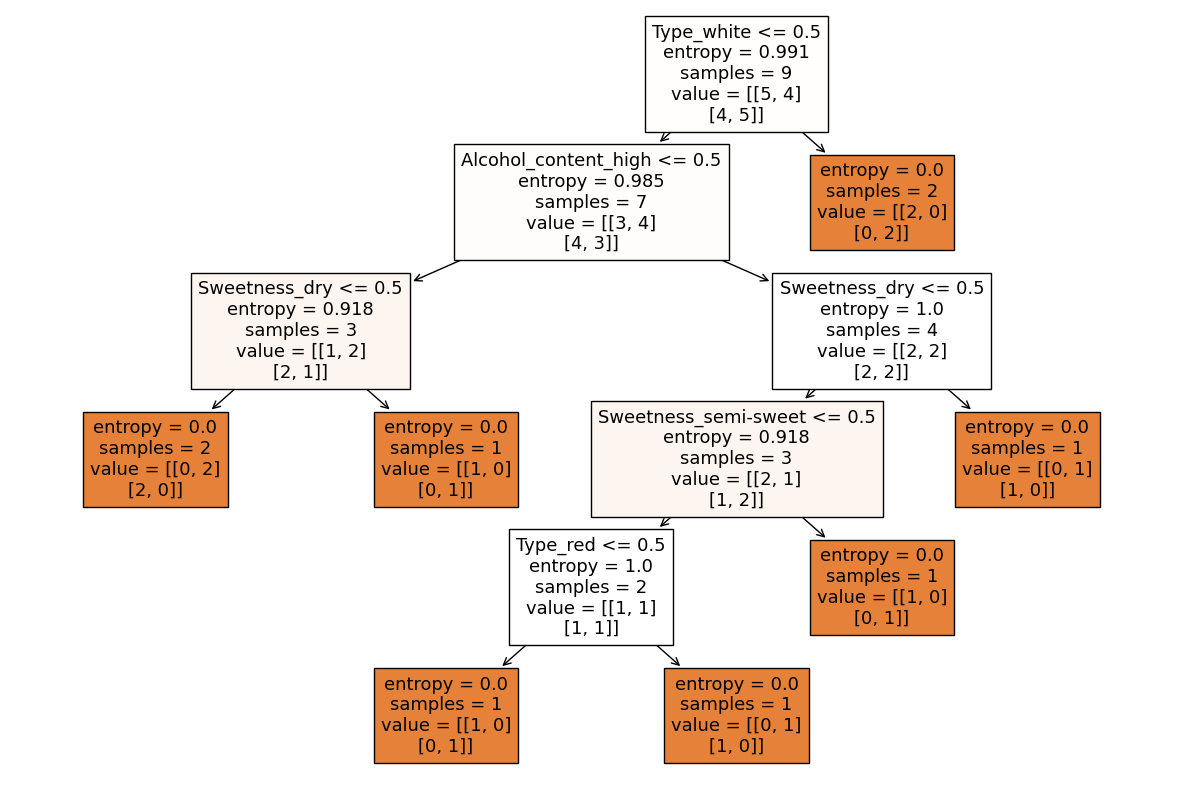

In [314]:
fig = plt.figure(figsize=(15, 10))
_ = plot_tree(clf, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)

### Gini impurity

In [315]:
data = pd.read_csv('wine_data.csv')
test_data = pd.read_csv('wine_data_test2.csv')

In [316]:
def split_data(data, class_name):
    y = data[class_name]
    x = data.drop(columns=[class_name])
    return x, y

In [317]:
def highligh_wrong_predictions(df, y_true, y_pred):
  style = pd.Series("background: salmon;", index=df[df[y_true] != df[y_pred]].index)
  display(df.style.apply(lambda s: style))

In [318]:
def fit_encoder(column):
    encoder = OrdinalEncoder(dtype=int)
    encoder.fit(column)
    return encoder


def encode_data(data, feature_names, encoders=None):
  if encoders:
    for i in range(len(feature_names)):
        data[feature_names[i]] = encoders[i].transform(data[feature_names[i]].values.reshape(-1, 1))

  else:
    encoders = []
    for feature_name in feature_names:
        feature_data = data[feature_name].values.reshape(-1, 1)
        encoder = fit_encoder(feature_data)
        encoders.append(encoder)
        data[feature_name] = encoder.transform(feature_data)

  return data, encoders

In [319]:
from sklearn.tree import DecisionTreeClassifier

X_train, Y = split_data(data, 'Popular')
X, encoders = encode_data(X_train, X_train.columns)

X_test, Y_test = split_data(test_data, 'Popular')
X_test, encoders = encode_data(X_test, X_test.columns)

clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X, Y)

predictions = clf.predict(X_test)
probabilities = clf.predict_proba(X_test)[:,1]

data_with_predictions = test_data.copy()
data_with_predictions['Prediction'] = predictions
highligh_wrong_predictions(data_with_predictions, 'Popular', 'Prediction')

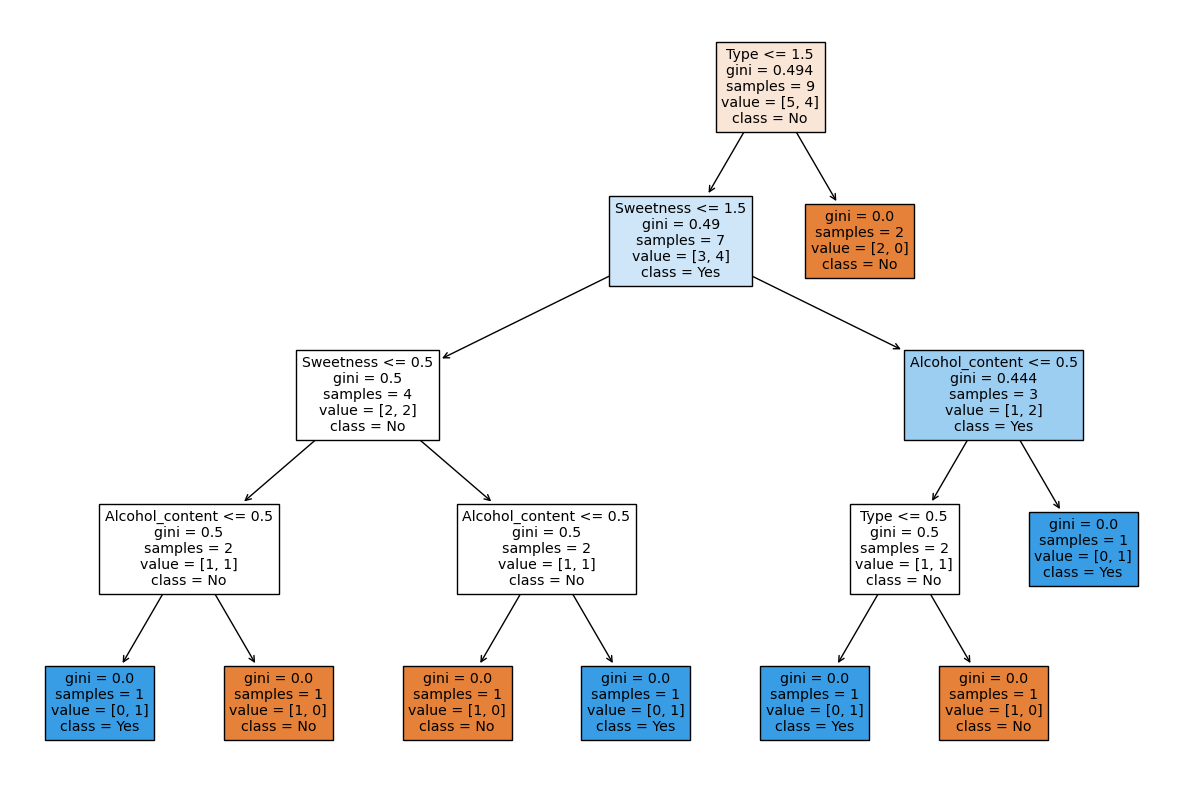

In [320]:
plt.figure(figsize=(15, 10)) # Resize figure
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
plt.show()

## Breast cancer dataset

In [321]:
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [322]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [323]:
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [324]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [326]:
clf = DecisionTreeClassifier(random_state=0)

In [327]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(ccp_alphas)

[0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

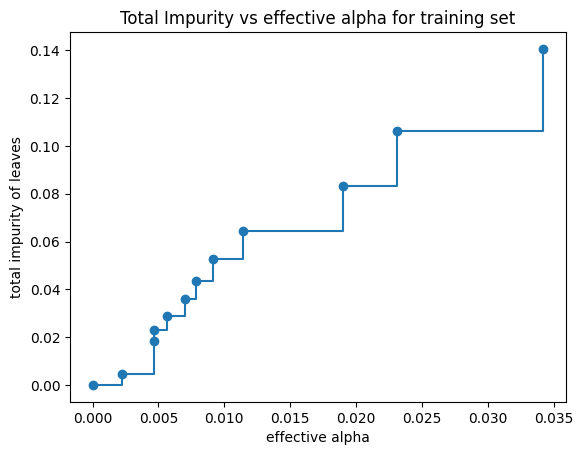

In [328]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [329]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


for clf, alpha in zip(clfs, ccp_alphas):
    print(f"Number of nodes in the tree is: {clf.tree_.node_count} with ccp_alpha: {alpha}")

Number of nodes in the tree is: 31 with ccp_alpha: 0.0
Number of nodes in the tree is: 27 with ccp_alpha: 0.0022664723976040134
Number of nodes in the tree is: 21 with ccp_alpha: 0.004647426339100881
Number of nodes in the tree is: 19 with ccp_alpha: 0.004659799593581376
Number of nodes in the tree is: 17 with ccp_alpha: 0.005633802816901408
Number of nodes in the tree is: 15 with ccp_alpha: 0.007042253521126761
Number of nodes in the tree is: 13 with ccp_alpha: 0.007841938420144537
Number of nodes in the tree is: 11 with ccp_alpha: 0.009114019793328328
Number of nodes in the tree is: 9 with ccp_alpha: 0.011443661971830986
Number of nodes in the tree is: 7 with ccp_alpha: 0.018988002086593604
Number of nodes in the tree is: 5 with ccp_alpha: 0.023141627543035996
Number of nodes in the tree is: 3 with ccp_alpha: 0.03422474765119576
Number of nodes in the tree is: 1 with ccp_alpha: 0.3272984419327777


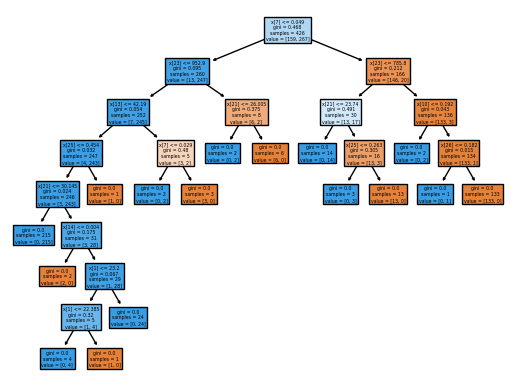

In [330]:
_ = plot_tree(clfs[0], filled=True)

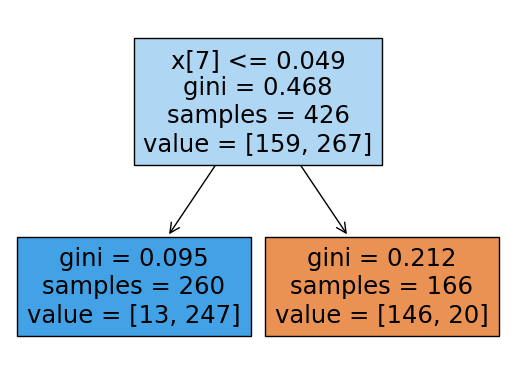

In [334]:
_ = plot_tree(clfs[-1], filled=True)

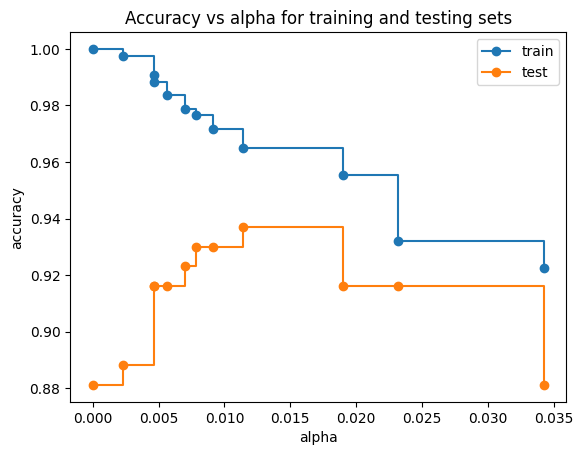

In [332]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()